In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.transform import resize
from skimage.morphology import opening
from skimage.segmentation import clear_border
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im_file = imread("./warped.jpeg", as_gray=True)
image = resize(im_file, (306, 306))
plt.imshow(image, cmap=plt.cm.gray)

FileNotFoundError: No such file: '/media/richard/Save/SudokuSolver/Sudoku/warped.jpeg'

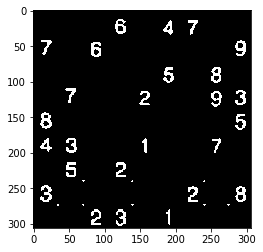

In [7]:
thresh = threshold_otsu(image)
binary = image > thresh
invert = np.invert(binary)
opend = opening(invert)
cleared = clear_border(opend)


fig, ax = plt.subplots()
ax.imshow(cleared, cmap=plt.cm.gray)

0.06314878892733564

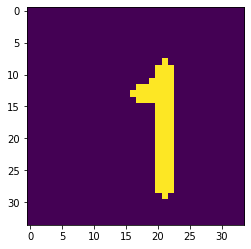

In [8]:
import math
from skimage.segmentation import clear_border


# remove artifacts connected to image border
plt.imshow(cleared)

size = math.floor(306/9)
i = 8
j = 5
square = cleared[(size*i): (i+1)*size, j*size :(j+1)*size]
plt.imshow(square)
np.mean(square)

## Threshold can be 0.05

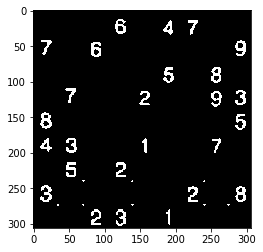

In [9]:
fig, ax = plt.subplots()
ax.imshow(cleared, cmap=plt.cm.gray)

num_rows= 9
num_cols = 9
presence = np.zeros((num_rows, num_cols))
max_mean = 0.05
for i in range(num_rows):
    for j in range(num_cols):
        size = int(306/9)
        h = size*j
        w = size*i
        square = cleared[(size*i): (i+1)*size, j*size :(j+1)*size]
        square_mean = np.mean(square)
        presence[i][j] = int(square_mean >= max_mean)

In [10]:
presence

array([[0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0.]])